In [41]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.svm import SVR
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV

In [2]:
data = pd.read_csv('01-conversion_data.csv')
data.head(5)

,country,age,new_user,source,total_pages_visited,converted
0,UK,25,1,Ads,1,0
1,US,23,1,Seo,5,0
2,US,28,1,Seo,4,0
3,China,39,1,Seo,5,0
4,US,30,1,Seo,6,0


In [6]:
print(data.country.unique())
print(sorted(data.age.unique()))

['UK' 'US' 'China' 'Germany']
[17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 72, 73, 77, 79, 111, 123]


Remove the abnormal data with a really large age

In [16]:
data_new = data[data['age'] < 111]
data_new.groupby(['country']).mean()


,age,new_user,total_pages_visited,converted
country,,,,
China,30.672972,0.698520,4.553523,0.001332
Germany,30.442895,0.677288,5.189966,0.062428
UK,30.449875,0.679849,5.082066,0.052612
US,30.566482,0.681985,4.930160,0.037801


Mean age, new_user, total_pages_visited are not too far for 4 countries; However, the mean converted is extremely small for China. It might be due to the language, or the design of hte website is more suitable for western countries.

In [21]:
data_g = data_new.groupby(['age']).mean()
#plt.plot(data_g['age'],data_g['converted'])
data_g

,new_user,total_pages_visited,converted
age,,,
17,0.667500,5.317362,0.071607
18,0.672336,5.184266,0.066029
19,0.675794,5.108996,0.058616
20,0.675266,5.129874,0.057109
21,0.679920,5.068028,0.053985
22,0.683617,5.073754,0.053243
23,0.683528,5.009484,0.047990
24,0.684259,5.020139,0.045448
25,0.679941,4.916419,0.038782


In [25]:
data_g['age'] = data_g.index

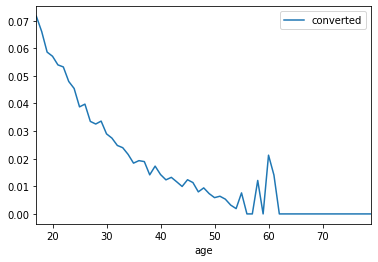

In [26]:
data_g.plot(x = 'age', y = 'converted' )

Mean converted vs age shows that the conversion rate is high for younger peple and decreases with age, but has several peaks around age 55 - 60. It might be due to the content is more acceptable to the younger people or the design of the website is hard for older people to use.

In [28]:
data_new_user = data_new.groupby(['new_user']).mean()
data_new_user

,age,total_pages_visited,converted
new_user,,,
0,30.417399,5.279938,0.071983
1,30.639017,4.686155,0.014021


New user has significant lower conversion rate.

In [30]:
data_total_pages = data_new.groupby(['total_pages_visited']).mean()
data_total_pages.reset_index(inplace = True)
data_total_pages

,total_pages_visited,age,new_user,converted
0,1,30.711701,0.703601,0.000000
1,2,30.701673,0.699188,0.000228
2,3,30.690251,0.699035,0.000251
3,4,30.729572,0.696730,0.000780
4,5,30.629476,0.694475,0.001570
5,6,30.666369,0.697432,0.003437
6,7,30.692737,0.691587,0.006769
7,8,30.625214,0.692216,0.015238
8,9,30.604343,0.683310,0.033067
9,10,30.622817,0.677443,0.061068


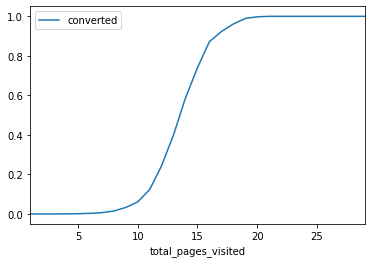

In [32]:
data_total_pages.plot(x = 'total_pages_visited', y = 'converted')

The more pages visited, higher conversion rate, which makes sense, indicating more interested in the content.

In [33]:
data_source = data_new.groupby(['source']).mean()
#data_total_pages.reset_index(inplace = True)
data_source

,age,new_user,total_pages_visited,converted
source,,,,
Ads,30.533835,0.685708,4.899480,0.034472
Direct,30.567978,0.686854,4.816901,0.028169
Seo,30.590239,0.684686,4.883881,0.032888


No big difference for different source

So from brief review of the factors, country, age, new_user, total_pages_visited are useful for the model.  
Use logistic regressor as a baseline model, then try other model:
random forest

In [36]:
X = data_new[['age','new_user','total_pages_visited']]
y = data_new['converted']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=666)

In [37]:
logistic = LogisticRegression(random_state=0).fit(X_train, y_train)

/Users/zhenyuxu/Applications/anaconda/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


In [38]:
logistic.score(X_test,y_test)

0.9853276599007149

In [40]:
regr = RandomForestRegressor(max_depth=3, random_state=0)
regr.fit(X_train, y_train)
regr.score(X_test,y_test)

/Users/zhenyuxu/Applications/anaconda/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


0.5986965837546739